In [8]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
from zipfile import ZipFile
from visualizations import plot_geopandas, plot_correlation, plot_pie
from constants import BRAZIL_IDH
from matplotlib import pyplot as plt
from pns_dict import PNS_DICT

PNS_DATA = Path('../data/processed/PNS_2019/all.zip').resolve()
zip_pns = ZipFile(PNS_DATA)
df = pd.read_csv(zip_pns.open(zip_pns.namelist()[0]), sep=",", low_memory=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,31,3156011,310236455,6,1,2019,2.0,1,4,1.0,...,1.0,9.0,6187.0,3094.0,6.0,NaN,4.0,NaN,NaN,20210825
1,41,4120011,410034277,4,1,2019,1.0,1,2,1.0,...,1.0,7.0,4200.0,4200.0,6.0,NaN,1.0,NaN,NaN,20210825
2,25,2552021,250039128,15,1,2019,2.0,2,4,1.0,...,NaN,NaN,1996.0,998.0,3.0,NaN,NaN,NaN,NaN,20210825
3,42,4220011,420042620,8,1,2019,4.0,1,2,1.0,...,1.0,10.0,2996.0,749.0,3.0,NaN,3.0,NaN,NaN,20210825
4,12,1210010,120004277,8,1,2019,2.0,1,1,1.0,...,NaN,NaN,400.0,200.0,1.0,NaN,NaN,NaN,NaN,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,13,1320010,130013569,6,1,2019,5.0,1,2,1.0,...,1.0,10.0,340.0,68.0,1.0,NaN,3.0,NaN,6.0,20210825
90842,32,3210011,320045325,12,1,2019,5.0,1,1,1.0,...,1.0,8.0,8998.0,1800.0,4.0,NaN,2.0,NaN,NaN,20210825
90843,43,4310111,430137012,4,1,2019,1.0,1,1,1.0,...,1.0,2.0,7000.0,7000.0,7.0,NaN,2.0,NaN,NaN,20210825
90844,11,1110012,110017590,6,1,2019,2.0,1,1,1.0,...,1.0,2.0,6100.0,3050.0,6.0,NaN,NaN,NaN,NaN,20210825


# Caracterização dos dados

In [4]:
print("O dataset PNS possui {} linhas e {} colunas (features).".format(*df.shape))

O dataset PNS possui 90846 linhas e 1087 colunas (features).


ValueError: cannot convert float NaN to integer

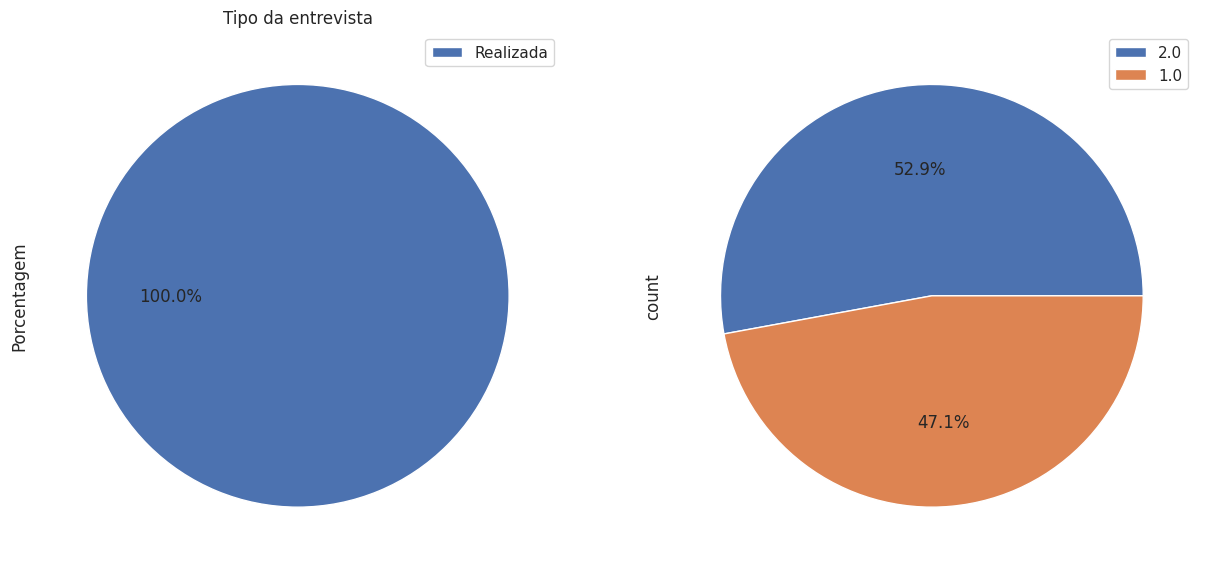

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_pie(df, 'V0015', PNS_DICT, axes[0])
plot_pie(df, 'C006', PNS_DICT,  axes[1])
plt.show()

In [29]:
len(df)

293726

In [27]:
df.groupby(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'C00301']).size().reset_index().shape[0]

279382

In [28]:
df.groupby(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS']).size().reset_index().shape[0]

108458

In [37]:
df['Q092'].count()

90846

In [35]:
df['Q092'].value_counts()

Q092
2.0    82514
1.0     8332
Name: count, dtype: int64

In [38]:
df = df.dropna(subset=['Q092'])

In [43]:
df

,V0001,V0024,UPA_PNS,V0006_PNS,C00301,P00102,P00103,P00104,P00201,P00402,...,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q092,res
0,11,1110011,110000016,1,1.0,1.0,60,60.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,True
9,11,1110011,110000016,2,4.0,1.0,65,65.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,False
10,11,1110011,110000016,3,1.0,1.0,77,77.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,False
18,11,1110011,110000016,4,1.0,2.0,NaN,56.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,False
19,11,1110011,110000016,5,1.0,1.0,55,55.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293709,53,5310220,530044434,9,2.0,1.0,63,63.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,False
293712,53,5310220,530044434,10,2.0,1.0,72,72.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,False
293713,53,5310220,530044434,11,1.0,1.0,87,87.0,5.0,1.0,...,1.0,2.0,1.0,2.0,3.0,1.0,1.0,NaN,2.0,False
293718,53,5310220,530044434,12,2.0,1.0,89,89.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,True


In [44]:
df.count()

V0001        90846
V0024        90846
UPA_PNS      90846
V0006_PNS    90846
C00301       90846
             ...  
P07007       90846
P07101       90846
P07201        8990
Q092         90846
res          90846
Length: 153, dtype: int64

In [45]:
df = df.dropna(axis=1)

In [47]:
df.value_counts()

V0001  V0024    UPA_PNS    V0006_PNS  C00301  P00102  P00201  P00402  P00601  P00602  P00603  P00604  P00605  P00607  P00608  P00609  P00610  P00611  P00612  P00613  P00614  P00615  P00616  P00617  P00618  P00619  P00620  P00621  P00622  P00623  P006  P00901  P01101  P013  P015  P02001  P01601  P018  P02002  P023  P02501  P02602  P02601  P027  P034  P042  P044  P04501  P04502  P046  P04701  P050  P067  P06701  P068  P069  P06901  P07004  P07005  P07006  P07007  P07101  Q092  res  
11     1110011  110000016  1          1.0     1.0     2.0     1.0     1.0     1.0     1.0     1.0     2.0     1.0     2.0     1.0     1.0     2.0     1.0     2.0     1.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0     1.0     2.0     7.0   1.0     3.0     6.0   3.0   7.0     0.0     3.0   1.0     7.0   0.0     0.0     3.0     2.0   1.0   0.0   2.0   3.0     1.0     1.0   2.0     3.0   3.0   4.0     1.0   2.0   2.0     2.0     2.0     2.0     2.0     1.0     1.0   True     1
33     3322012  3300213